In [20]:
loc_apt['아파트명'].unique()

array(['래미안 장위포레카운티', '래미안장위퍼스트하이', '꿈의숲 아이파크', ..., '현대벤처빌', '신촌다올노블리움',
       '광남벨라스 2동'], dtype=object)

In [21]:
loc_apt['아파트명'].shape

(90666,)

In [22]:
loc_apt['아파트명'].unique().shape

(5836,)

In [23]:
# 아파트 브랜드별 아파트수 랭킹
most = pd.Series(' '.join(loc_apt['아파트명']).split()).value_counts()
most_apt = pd.DataFrame(most)
most_apt = most_apt.rename({0: '아파트수'}, axis=1)
most_apt.head(20)

,아파트수
현대,875
한신,756
두산,642
래미안,548
삼성래미안,538
벽산,518
신동아,507
롯데캐슬,478
은평뉴타운,475
주공2,438


In [24]:
# 아파트별 평균 거래금액
price_apt = loc_apt.pivot_table('거래금액',index='아파트명')
price_apt

,거래금액
아파트명,
(1101-1),1.184625
(185-5),9.516667
(23-42),2.500000
(246-11),5.700000
(323-4),6.200000
...,...
힐탑아파트3차(894-3),3.620000
힐탑트레져1동,30.900000
힐튼빌리지1차,6.300000


In [25]:
# top 20 아파트 평균 거래금액
price_most_apt = pd.concat([most_apt,price_apt],axis=1)
df_apt = price_most_apt.dropna().head(20)
df_apt
# 서울시에서 가장 많은 아파트 브랜드는 '현대'아파트라는 것을 확인할 수 있다. 

,아파트수,거래금액
현대,875.0,7.630777
한신,756.0,5.904673
두산,642.0,6.967447
삼성래미안,538.0,10.063290
벽산,518.0,5.752733
신동아,507.0,9.541181
롯데캐슬,478.0,9.435295
주공2,438.0,4.031747
에스케이북한산시티,411.0,5.941509
힐스테이트,384.0,16.124091


In [26]:
df_apt.index

Index(['현대', '한신', '두산', '삼성래미안', '벽산', '신동아', '롯데캐슬', '주공2', '에스케이북한산시티',
       '힐스테이트', '삼성', '대우', '극동', '우성', '쌍용', '동아', '신동아아파트1', '파크리오', '중앙하이츠',
       '현대1'],
      dtype='object')

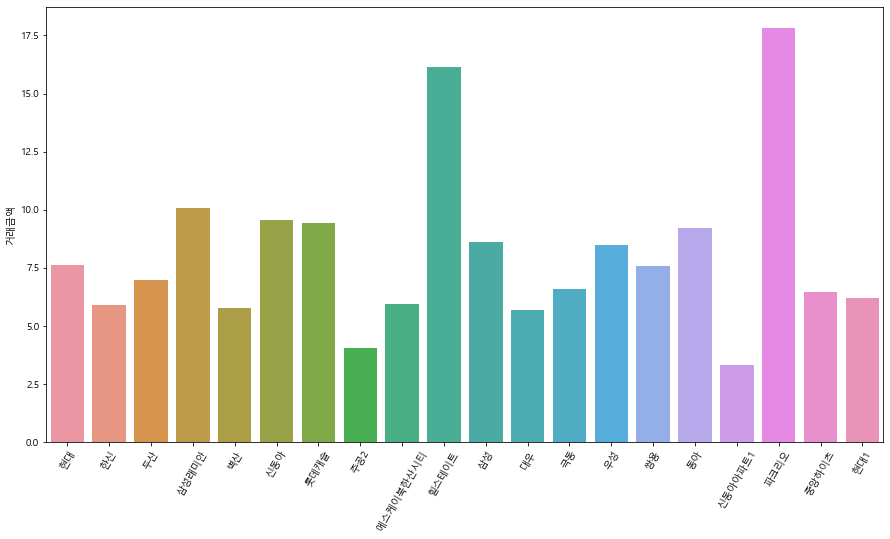

In [27]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df_apt.index, y=df_apt['거래금액'])
plt.xticks(rotation=60)
plt.show()
# 서울시에 가장 많은 아파트 브랜드 20개 중 가장 비싼 아파트는 '파크리오'이고, 가장 저렴한 아파트는 '신동아아파트1'이라는 것을 확인할 수 있다.
# 고가 브랜드 일수록 아파트 거래금액이 더 비싸다는 것을 알 수 있다.

In [28]:

df_apt2 = price_most_apt.dropna()
df_apt2 = df_apt2.sort_values('거래금액',ascending=False)
df_apt2 = df_apt2.head(20)
df_apt2

,아파트수,거래금액
더펜트하우스청담,1.0,95.000000
아펠바움,1.0,48.000000
한양8(81동한개동),6.0,47.366667
삼성동라테라스,1.0,47.000000
한남더힐,44.0,46.943182
트라움하우스3,2.0,46.000000
대림빌라트,1.0,45.000000
레베빌,1.0,45.000000
"현대7차(73~77,82,85동)",22.0,43.638636
"현대2차(10,11,20,23,24,25동)",18.0,42.611111


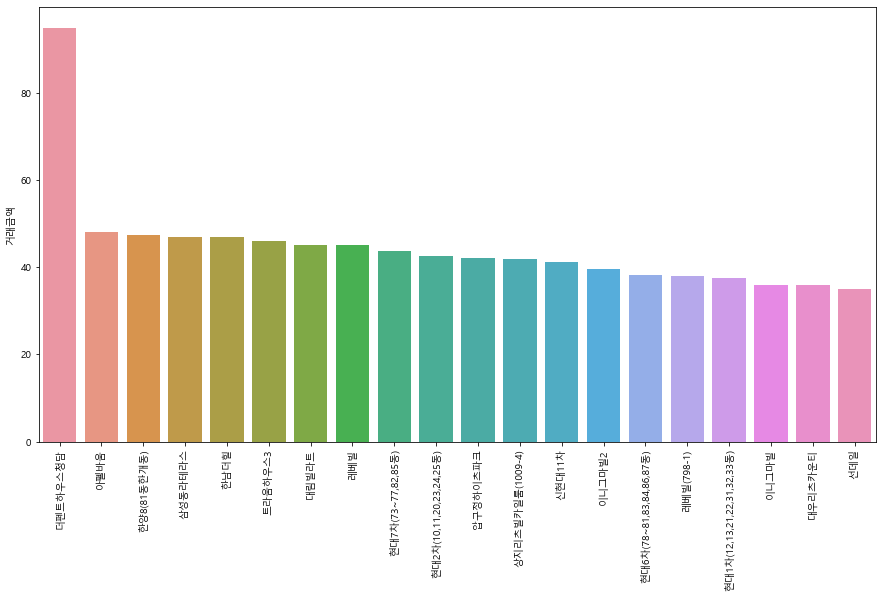

In [29]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df_apt2.index, y=df_apt2['거래금액'])
plt.xticks(rotation=90)
plt.show()
# 서울시에서 가장 비싼 아파트브랜드 20개를 확인해보니, 거래금액이 높은 아파트브랜드들은 아파트수가 더 적은 것을 확인할 수 있다.